# **Data Preprocessing**

In [1]:
#Import Library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import squarify

# **Load The Data**

In [2]:
data_oct = pd.read_csv('../input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv',nrows=1)
data_oct

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c


**only load the required data **

In [3]:
data_oct = pd.read_csv('../input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv',usecols=['event_time','event_type','price','user_id','user_session'])
data_nov = pd.read_csv('../input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv',usecols=['event_time','event_type','price','user_id','user_session'])

In [4]:
data_oct.head()

,event_time,event_type,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [5]:
data_oct['event_type'].unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [6]:
data_nov.head()

,event_time,event_type,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [7]:
data_nov['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

**Column event type have view, cart, and purchase but we only need purchase data so use .loc to get only purchase data**

In [8]:
data_oct=data_oct.loc[data_oct.event_type == 'purchase']
data_nov=data_nov.loc[data_nov.event_type == 'purchase']

**Then union October and November data**

In [9]:
frames = [data_oct, data_nov]
data=pd.concat(frames)

In [10]:
data.head()

,event_time,event_type,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37 UTC,purchase,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02 UTC,purchase,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07 UTC,purchase,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26 UTC,purchase,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553


In [11]:
%%time
data['event_time']=pd.to_datetime(data['event_time']).dt.tz_convert(None)

CPU times: user 3min 54s, sys: 28.6 ms, total: 3min 54s
Wall time: 3min 54s


In [12]:
data.dtypes

event_time      datetime64[ns]
event_type              object
price                  float64
user_id                  int64
user_session            object
dtype: object

In [13]:
%%time
#save dataframe as feather in case our notebook got crashed
#feather save column data types
import pyarrow.feather as feather
os.makedirs('tmp', exist_ok=True)  # Make a temp dir for storing the feather file
feather.write_feather(data, './tmp/data')

CPU times: user 1.39 s, sys: 371 ms, total: 1.76 s
Wall time: 1.59 s


In [14]:
%%time
#load the feather data cause feather more lightweight
data = pd.read_feather('./tmp/data')
data

CPU times: user 609 ms, sys: 847 ms, total: 1.46 s
Wall time: 1.3 s


,event_time,event_type,price,user_id,user_session
0,2019-10-01 00:02:14,purchase,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,2019-10-01 00:04:37,purchase,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2,2019-10-01 00:06:02,purchase,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
3,2019-10-01 00:07:07,purchase,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
4,2019-10-01 00:09:26,purchase,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
...,...,...,...,...,...
1659783,2019-11-30 23:58:14,purchase,346.70,547804983,717566cf-ef93-4078-ba8f-169a3ac9f1a0
1659784,2019-11-30 23:58:22,purchase,1437.02,515582054,829c20b5-696e-4a8a-8a9f-171014a3ecbe
1659785,2019-11-30 23:58:57,purchase,235.60,579876821,ca50e291-43f3-4ca2-9e13-20ee6b8b25f0
1659786,2019-11-30 23:59:15,purchase,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c


In [15]:
data.dtypes

event_time      datetime64[ns]
event_type              object
price                  float64
user_id                  int64
user_session            object
dtype: object

we can see that each session is equal to 1 transaction in terms of sessions being multiples with every product sold
so we need to merge every session together 

In [16]:
data=data.groupby(by='user_session').agg(Date_order=('event_time',lambda x: x.max()),
                                                  user_id=('user_id',lambda x: x.unique()),
                                          Quantity=('user_session','count'),
                                         money_spent=('price','sum')).reset_index(drop=True)
data

,Date_order,user_id,Quantity,money_spent
0,2019-10-06 11:34:30,546521725,1,289.52
1,2019-10-25 08:39:11,560486342,1,171.90
2,2019-11-02 08:35:35,563180871,1,123.55
3,2019-11-11 03:35:34,566954797,1,151.61
4,2019-10-17 13:37:59,560744406,2,379.78
...,...,...,...,...
1402753,2019-11-18 11:20:56,519523637,1,45.03
1402754,2019-11-17 10:59:07,523658055,1,32.15
1402755,2019-11-25 10:56:59,518862395,2,163.19
1402756,2019-11-17 05:52:00,571263795,2,66.64


# **RFM Analysis**

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

* Recency – How recently did the customer purchase?
* Frequency – How often do they purchase?
* Monetary Value – How much do they spend?



so we will make that 3 attribute Recency, Frequency, and Monetary

In [17]:
data['Date_order'].max()

Timestamp('2019-11-30 23:59:44')

The last date we have is 2019-11-30 so we will use date 2019-12-1 as reference


In [18]:
import datetime as dt
study_date = dt.datetime(2019,12,1)
data=pd.DataFrame(data)
data['last_purchase']=study_date - data['Date_order']
data['last_purchase'].astype('timedelta64[D]')
data['last_purchase']=data['last_purchase'] / np.timedelta64(1, 'D')
data.head()


,Date_order,user_id,Quantity,money_spent,last_purchase
0,2019-10-06 11:34:30,546521725,1,289.52,55.517708
1,2019-10-25 08:39:11,560486342,1,171.90,36.639456
2,2019-11-02 08:35:35,563180871,1,123.55,28.641956
3,2019-11-11 03:35:34,566954797,1,151.61,19.850301
4,2019-10-17 13:37:59,560744406,2,379.78,44.431956


In [19]:
#Calculate Recency, Frequency, and Monetary of the data
RFM= data.groupby('user_id').agg(Recency=('last_purchase',lambda x: x.min()),
                                 Frequency=('user_id',lambda x: x.count()),
                                 Monetary=('money_spent',lambda x: x.sum()))
RFM.head()


,Recency,Frequency,Monetary
user_id,,,
138340325,19.758866,1,93.50
225644257,18.819780,1,40.91
253299396,24.546169,1,246.85
256164170,10.651921,1,113.23
264649825,55.141539,2,1240.04


# **Frequency**

Frequency attribute answers the question: How often do they purchase?

In [20]:
RFM['Frequency'].describe()

count    697470.000000
mean          2.011209
std           2.979720
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         328.000000
Name: Frequency, dtype: float64

# **Monetary**

Monetary attribute answers the question: How much do they spend overtime?


In [21]:
RFM['Recency'].describe()

count    697470.000000
mean         25.094585
std          17.223048
min           0.000185
25%          12.871965
50%          20.587141
75%          39.693811
max          60.995810
Name: Recency, dtype: float64

# **RFM Segmentation**

RFM segmentation is a useful tool for identifying groups of clients who should be given extra attention. RFM segmentation enables marketers to target specific groups of customers with communications that are far more relevant to their unique behaviors, resulting in improved response rates, enhanced loyalty, and increased customer lifetime value. RFM segmentation is a method for segmenting data, just like other approaches. 

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

**RFM Quartiles**

In [22]:
RFM.quantile(q=[0.25,0.5,0.75])

,Recency,Frequency,Monetary
0.25,12.871965,1.0,118.38
0.50,20.587141,1.0,257.15
0.75,39.693811,2.0,669.23


In [23]:
quartiles=RFM.quantile(q=[0.25,0.5,0.75]).to_dict()
quartiles

{'Recency': {0.25: 12.871964699074075,
  0.5: 20.587141203703705,
  0.75: 39.69381076388889},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 118.38, 0.5: 257.15, 0.75: 669.23}}

# **Creation of RFM Segments**

In [24]:
## for Recency 

def R(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary 

def FM(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1    
    

In [25]:
#create RFM segmentation column
RFM['R_Quartile'] = RFM['Recency'].apply(R, args=('Recency',quartiles,))
RFM['F_Quartile'] = RFM['Frequency'].apply(FM, args=('Frequency',quartiles,))
RFM['M_Quartile'] = RFM['Monetary'].apply(FM, args=('Monetary',quartiles,))
RFM['RFM_segmentation'] = RFM.R_Quartile.map(str) \
                    + RFM.F_Quartile.map(str) \
                    + RFM.M_Quartile.map(str)
RFM['RFM_score'] = RFM.R_Quartile.map(int) \
                    + RFM.F_Quartile.map(int) \
                    + RFM.M_Quartile.map(int)
RFM.head()


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
user_id,,,,,,,,
138340325,19.758866,1,93.50,2,4,4,244,10
225644257,18.819780,1,40.91,2,4,4,244,10
253299396,24.546169,1,246.85,3,4,3,343,10
256164170,10.651921,1,113.23,1,4,4,144,9
264649825,55.141539,2,1240.04,4,2,1,421,7


In [26]:
# Define rfm_level function
def RFM_label(data):
    if data['RFM_score'] >= 10:
        return 'Lost'
    elif ((data['RFM_score'] >= 9) and (data['RFM_score'] < 10)):
        return 'Hibernating'
    elif ((data['RFM_score'] >= 8) and (data['RFM_score'] < 9)):
        return 'Can’t Lose Them'
    elif ((data['RFM_score'] >= 7) and (data['RFM_score'] < 8)):
        return 'About To Sleep'
    elif ((data['RFM_score'] >= 6) and (data['RFM_score'] < 7)):
        return 'Promising'
    elif ((data['RFM_score'] >= 5) and (data['RFM_score'] < 6)):
        return 'Potential Loyalist'
    elif ((data['RFM_score'] >= 4) and (data['RFM_score'] < 5)):
        return 'Loyal Customers'
    else:
        return 'Champions'
#Create RFM label for customer
RFM['RFM_label'] = RFM.apply(RFM_label, axis=1)
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_label
user_id,,,,,,,,,
138340325,19.758866,1,93.50,2,4,4,244,10,Lost
225644257,18.819780,1,40.91,2,4,4,244,10,Lost
253299396,24.546169,1,246.85,3,4,3,343,10,Lost
256164170,10.651921,1,113.23,1,4,4,144,9,Hibernating
264649825,55.141539,2,1240.04,4,2,1,421,7,About To Sleep


How many customers do we have in each segment?


In [27]:
# Calculate average values for each RFM_Level, and return a size of each segment 
RFM_desc = RFM.groupby('RFM_label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(RFM_desc)

                   Recency Frequency Monetary        
                      mean      mean     mean   count
RFM_label                                            
About To Sleep        20.5       1.7    628.8   71309
Can’t Lose Them       19.9       1.3    406.9   90809
Champions              5.1       7.9   3777.5   37405
Hibernating           22.5       1.1    309.2  114053
Lost                  38.6       1.0    141.1  231538
Loyal Customers       10.4       4.3   1897.9   40675
Potential Loyalist    16.8       3.5   1468.7   52728
Promising             21.1       2.5   1009.3   58953


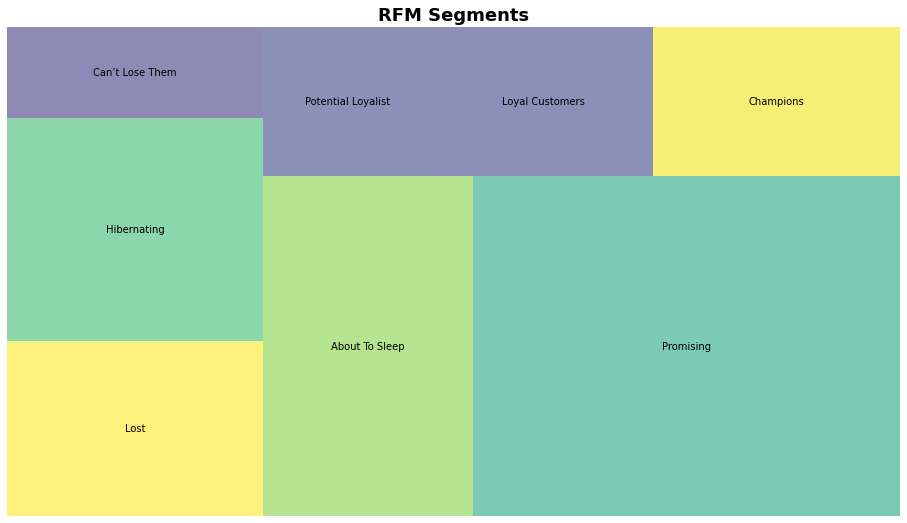

In [28]:
RFM_desc.columns = RFM_desc.columns.droplevel()
RFM_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=RFM_desc['Count'], 
              label=['Lost',
                     'Hibernating',
                     'Can’t Lose Them',
                     'About To Sleep',
                     'Promising', 
                     'Potential Loyalist', 
                     'Loyal Customers',
                     'Champions'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

Now that we've identified our customer categories, we can decide how to approach or deal with each customer.

* Champions : Reward them. Can be early adopters of new products. Will promote your brand. Most likely to send referrals.
* Loyal Customer : Upsell higher value products. Ask for reviews.
* Potential Loyalist : Offer membership / loyalty program. Keep them engaged. Offer personalised recommendations.
* Promising : Offer coupons. Bring them back to the platform and keep them engaged. Offer personalised recommendations.
* About to Sleep : Win them back via renewals or newer products, don’t lose them to competition. Talk to them if necessary. Spend time on highest possible personalisation.
* Can't Lose Them : Provide helpful resources on the site. Send personalised emails.
* Hibernating : Make subject lines of emails very personalised. Revive their interest by a specific discount on a specific product.
* Lost : Revive interest with reach out campaign. Ignore otherwise.

